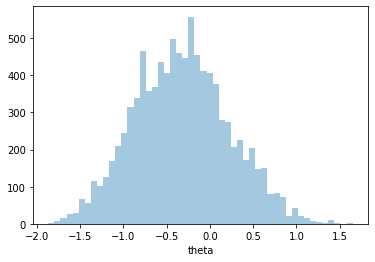

-0.3215478136501531
The 95% credible set is  -1.3938910901776493 0.7507954628773432


In [32]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(6)

data = np.array([-2, -3, 4, -7,0,4])
theta = 1 # initial value
thetas = [theta]

def sum_theta(data, theta):
    total = 0
    for i in data:
        c = i - theta
        total += c**2/8
    return total

for i in range(10000):
    theta_prop = np.random.uniform(-2,2)
    prod_1 = np.exp(-sum_theta(data, theta_prop))
    prod_2 = np.exp(-sum_theta(data, theta))
    
    r = ((1+np.cos(np.pi*theta_prop/2))/2*prod_1)/((1+np.cos(np.pi*theta/2))/2*prod_2)
    
    rho = np.amin([r,1])
    z = np.random.uniform()
    if rho > z:
        theta = theta_prop
    thetas.append(theta)

    
thetas = thetas[501:]
sns.distplot(thetas, kde = False, axlabel ="theta")
plt.show()

B_estimator = np.mean(thetas)
print (B_estimator)

var = np.var(thetas)

ubl = B_estimator + 1.96*np.sqrt(var)
lbl = B_estimator - 1.96*np.sqrt(var)

print ("The 95% credible set is ",lbl,ubl)

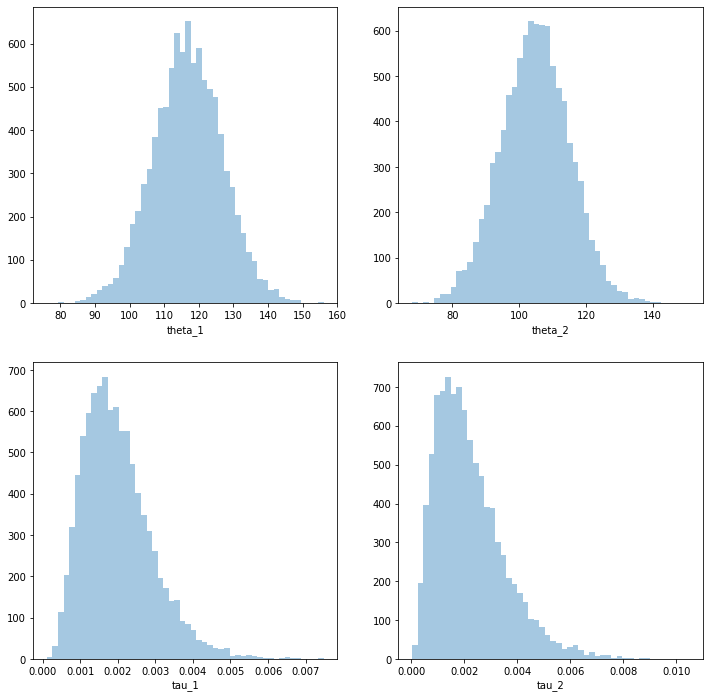

The proportion of positive differences is: 0.7917
2.5% percentile: -15.795382413700445
97.5% percentile: 39.80408752501205


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(6)
data_1 = np.array([134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123])
data_2 = np.array([70, 118, 101, 85, 107, 132, 94])

def probability(data1, data2):
    total_1 = sum(data_1)
    total_2 = sum(data_2)
    n_1 = len(data_1)
    n_2 = len(data_2)
    thetas_new = np.array([])
    thetas_1 = np.array([])
    taus_1 = np.array([])
    thetas_2 = np.array([])
    taus_2 = np.array([])
    theta_0 = 110 
    tau_0= 1/100
    a = 0.01
    b = 4
    
    #initial values
    theta_1 = 110
    tau_1 = 0.0025
    
    theta_2 = 110
    tau_2 = 0.0025
    for i in range(10000):
        theta_new = np.random.normal((tau_1*total_1+tau_0*theta_0)/(tau_0+n_1*tau_1)-(tau_2*total_2+tau_0*theta_0)/(tau_0+n_2*tau_2),np.sqrt(1/tau_0+n_1*tau_1+1/tau_0+n_2*tau_2))
        thetas_new = np.append(thetas_new, theta_new)
        theta_1_new = np.random.normal((tau_1*total_1+tau_0*theta_0)/(tau_0+n_1*tau_1),np.sqrt(1/tau_0+n_1*tau_1))
        tau_1_new = np.random.gamma(a + n_1/2,  1/(b+1/2 * np.sum((data_1 - theta_1_new)**2)))
        thetas_1 = np.append(thetas_1, theta_1_new)
        taus_1 = np.append(taus_1, tau_1_new)
        theta_1 = theta_1_new
        tau_1 = tau_1_new
        
        theta_2_new = np.random.normal((tau_2*total_2+tau_0*theta_0)/(tau_0+n_2*tau_2),np.sqrt(1/tau_0+n_2*tau_2))
        tau_2_new = np.random.gamma(a + n_2/2,  1/(b+1/2 * np.sum((data_2 - theta_2_new)**2)))
        thetas_2 = np.append(thetas_2, theta_2_new)
        taus_2 = np.append(taus_2, tau_2_new)
        theta_2 = theta_2_new
        tau_2 = tau_2_new
        
    return thetas_1[501:], taus_1[501:], thetas_2[501:], taus_2[501:], thetas_new

thetas_1, taus_1,thetas_2, taus_2, thetas_new = probability(data_1,data_2)



plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
sns.distplot(thetas_1, kde=False, axlabel="theta_1")
plt.subplot(2, 2, 2)
sns.distplot(thetas_2, kde=False, axlabel="theta_2")
plt.subplot(2, 2, 3)
sns.distplot(taus_1, kde=False, axlabel="tau_1")
plt.subplot(2, 2, 4)
sns.distplot(taus_2, kde=False, axlabel="tau_2")
plt.show()


print ("The proportion of positive differences is:", sum(thetas_new>0)/len(thetas_new))

print ("2.5% percentile:", np.percentile(thetas_new, 2.5))
print ("97.5% percentile:", np.percentile(thetas_new, 97.5))
plt.show()



In [14]:
thetas_new

array([217.36291671, 211.97784967, 216.61897867, ..., 221.67112595,
       220.55215294, 218.14235321])

In [17]:
thetas_1

array([130.92637252, 107.77252385, 122.5020713 , ..., 123.60777173,
       121.29780147,  96.54581847])